In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
#import plotly.express as px
import streamlit as st
import os


In [2]:
car_data = pd.read_csv("E:\ML_Pro\MLCar_price_Predict\data\car_data.csv")

display (car_data )


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\hp\AppData\Local\Temp\ipykernel_1884\564216495.py:1: SyntaxWarning: invalid escape sequence '\M'
  car_data = pd.read_csv("E:\ML_Pro\MLCar_price_Predict\data\car_data.csv")


,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,"$50,990",NaN,"$50,990",Compact,Coupe,V6,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,28 mpg
1606,6411,Nissan,Z,2023,Proto Spec,"$53,990",NaN,"$53,990",Compact,Coupe,V6,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,28 mpg
1607,6412,Nissan,Z,2023,Proto Spec,"$53,990",NaN,"$53,990",Compact,Coupe,V6,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,24 mpg
1608,6413,Nissan,Z,2023,Sport,"$40,990",NaN,"$40,990",Compact,Coupe,V6,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,24 mpg


In [3]:
for column in car_data:
    unique_vals = np.unique(car_data[column].fillna('0'))
    nr_value = len(unique_vals)
    if nr_value <=12:
        print('The number of value for feature {}:{}'.format(column, nr_value))

The number of value for feature Make:7
The number of value for feature Year:2
The number of value for feature Body Size:3
The number of value for feature Body Style:12
The number of value for feature Cylinders:10
The number of value for feature Engine Aspiration:6
The number of value for feature Drivetrain:4
The number of value for feature Transmission:2


Display Null values in each column 

In [4]:
print(car_data.isnull().sum())

index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64


Dropping the columns that have lots of nulls

In [5]:
car_data = car_data.drop(['Invoice Price', 'Cylinders', 'Highway Fuel Economy'], axis=1)
print(car_data.isnull().sum())

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Horsepower            5
Torque               27
dtype: int64


Fill the NULL values in the Horsepower column 
Create a new column ‘Horsepower_No’ by getting the first three characters from the column ‘Horsepower’


In [6]:
car_data['Horsepower_No'] = car_data['Horsepower'].str[0:3].astype(float)
display(car_data)

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
0,0,Aston Martin,DBX707,2024,Base,"$242,000","$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,"$50,990","$50,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0
1606,6411,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0
1607,6412,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0
1608,6413,Nissan,Z,2023,Sport,"$40,990","$40,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0


Display the records where 'Horsepower_No' is NULL 
There are 5 records where 'Horsepower_No'  is null 


In [7]:
display(car_data[car_data['Horsepower_No'].isna()])

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
371,971,Ford,F-150 Lightning,2024,Flash,"$67,995","$67,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
372,972,Ford,F-150 Lightning,2024,Lariat,"$76,995","$76,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
373,973,Ford,F-150 Lightning,2024,Platinum,"$84,995","$84,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
374,974,Ford,F-150 Lightning,2024,Pro,"$54,995","$54,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
375,975,Ford,F-150 Lightning,2024,XLT,"$62,995","$62,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN


Display the Average 'Horsepower_No'  where car make is “Ford”.
This used to fill the NULL Values  in the 'Horsepower_No' cells 
All the null values are for the car make, which is Ford 


In [8]:
mean_Horsepower = car_data['Horsepower_No'][car_data['Make'] == 'Ford'].mean()
print(mean_Horsepower)

333.2254428341385


Fill the NULL 'Horsepower_No' and 'Horsepower' with the Average 'Horsepower_No' 

In [9]:
car_data['Horsepower_No'] = car_data['Horsepower_No'].fillna(mean_Horsepower)
car_data['Horsepower'] = car_data['Horsepower'].fillna(mean_Horsepower)
display(car_data[car_data['Horsepower_No'].isna()])

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No


Fill the NULL values in the Torque column 
Create a new column 'Torque_No' by getting the first three characters from the column Torque


In [10]:
car_data['Torque_No'] = car_data['Torque'].str[0:3].astype(float)
print(car_data['Torque_No'])

0       663.0
1       221.0
2       221.0
3       221.0
4       221.0
        ...  
1605    350.0
1606    350.0
1607    350.0
1608    350.0
1609    350.0
Name: Torque_No, Length: 1610, dtype: float64


Display the records where 'Torque_No' is NULL 

In [11]:
mean_torque = car_data[car_data['Torque_No'].isna()]
print(mean_torque)

      index  Make                Model  Year                 Trim     MSRP  \
42       42  Audi  Q4 Sportback e-tron  2024         Premium w/55  $58,200   
44       44  Audi  Q4 Sportback e-tron  2024    Premium Plus w/55  $62,900   
46       46  Audi  Q4 Sportback e-tron  2024        Prestige w/55  $65,200   
49       49  Audi            Q4 e-tron  2024         Premium w/55  $55,200   
52       52  Audi            Q4 e-tron  2024    Premium Plus w/55  $59,900   
54       54  Audi            Q4 e-tron  2024        Prestige w/55  $62,200   
75       75  Audi  Q8 Sportback e-tron  2024  Premium Plus S line  $82,200   
76       76  Audi  Q8 Sportback e-tron  2024       Premium S line  $77,800   
77       77  Audi  Q8 Sportback e-tron  2024      Prestige S line  $88,200   
78       78  Audi            Q8 e-tron  2024              Premium  $74,400   
79       79  Audi            Q8 e-tron  2024         Premium Plus  $78,800   
80       80  Audi            Q8 e-tron  2024             Prestig

Display the Average 'Torque_No'. This used to fill the NULL Values  in the Torque cells 

In [12]:
mean_torque = car_data['Torque_No'].mean()
print(mean_torque)

364.9734680985471


Fill the NULL 'Torque_No' and 'Torque' with the Average 'Torque_No'

In [13]:

car_data['Torque_No'] = car_data['Torque_No'].fillna(mean_torque)
car_data['Torque'] = car_data['Torque'].fillna(mean_torque)
print (car_data.isnull().sum())



index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower           0
Torque               0
Horsepower_No        0
Torque_No            0
dtype: int64


Display the data types of all columns 



In [14]:

print (car_data.dtypes)	


index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                  object
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower            object
Torque                object
Horsepower_No        float64
Torque_No            float64
dtype: object


Cleaning the column MSRP
Remove the $ symbol and the comma in MSRP 


In [15]:
car_data['MSRP'] = car_data['MSRP'].str.replace('$', "")
car_data['MSRP'] = car_data['MSRP'].str.replace(',','').astype(float)
display(car_data)

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
0,0,Aston Martin,DBX707,2024,Base,242000.0,"$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,"$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,"$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,"$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,"$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,50990.0,"$50,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1606,6411,Nissan,Z,2023,Proto Spec,53990.0,"$53,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1607,6412,Nissan,Z,2023,Proto Spec,53990.0,"$53,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1608,6413,Nissan,Z,2023,Sport,40990.0,"$40,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0


Cleaning the column Used/New Price.
Remove the $ symbol and the comma in Used/New Price


In [16]:
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace('$','')
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace(',','').astype(float)
display (car_data)


,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
0,0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,50990.0,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1606,6411,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1607,6412,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1608,6413,Nissan,Z,2023,Sport,40990.0,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0


Create the pair plot 

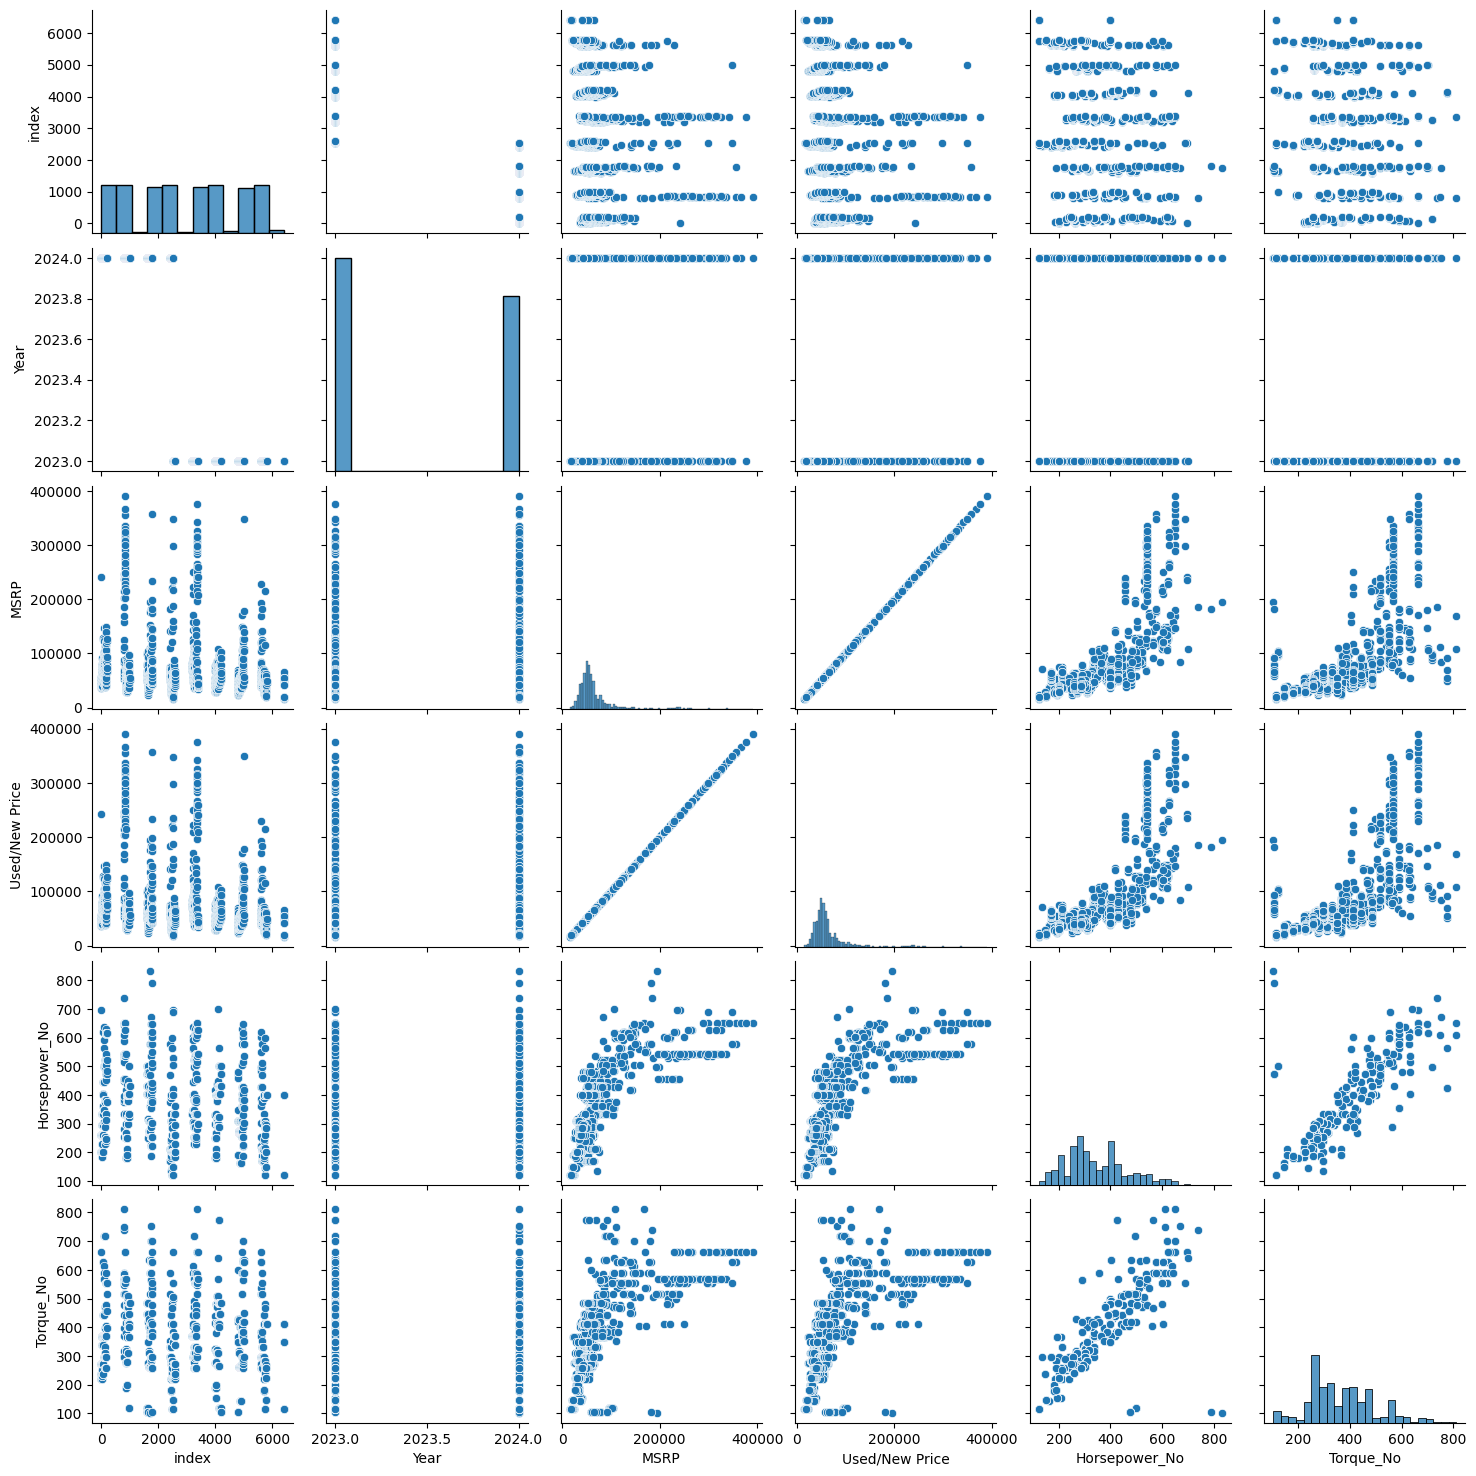

In [17]:
sns.pairplot(car_data)
plt.show()


Create the pair plot with a limited number of columns 
Hue-'Engine Aspiration'


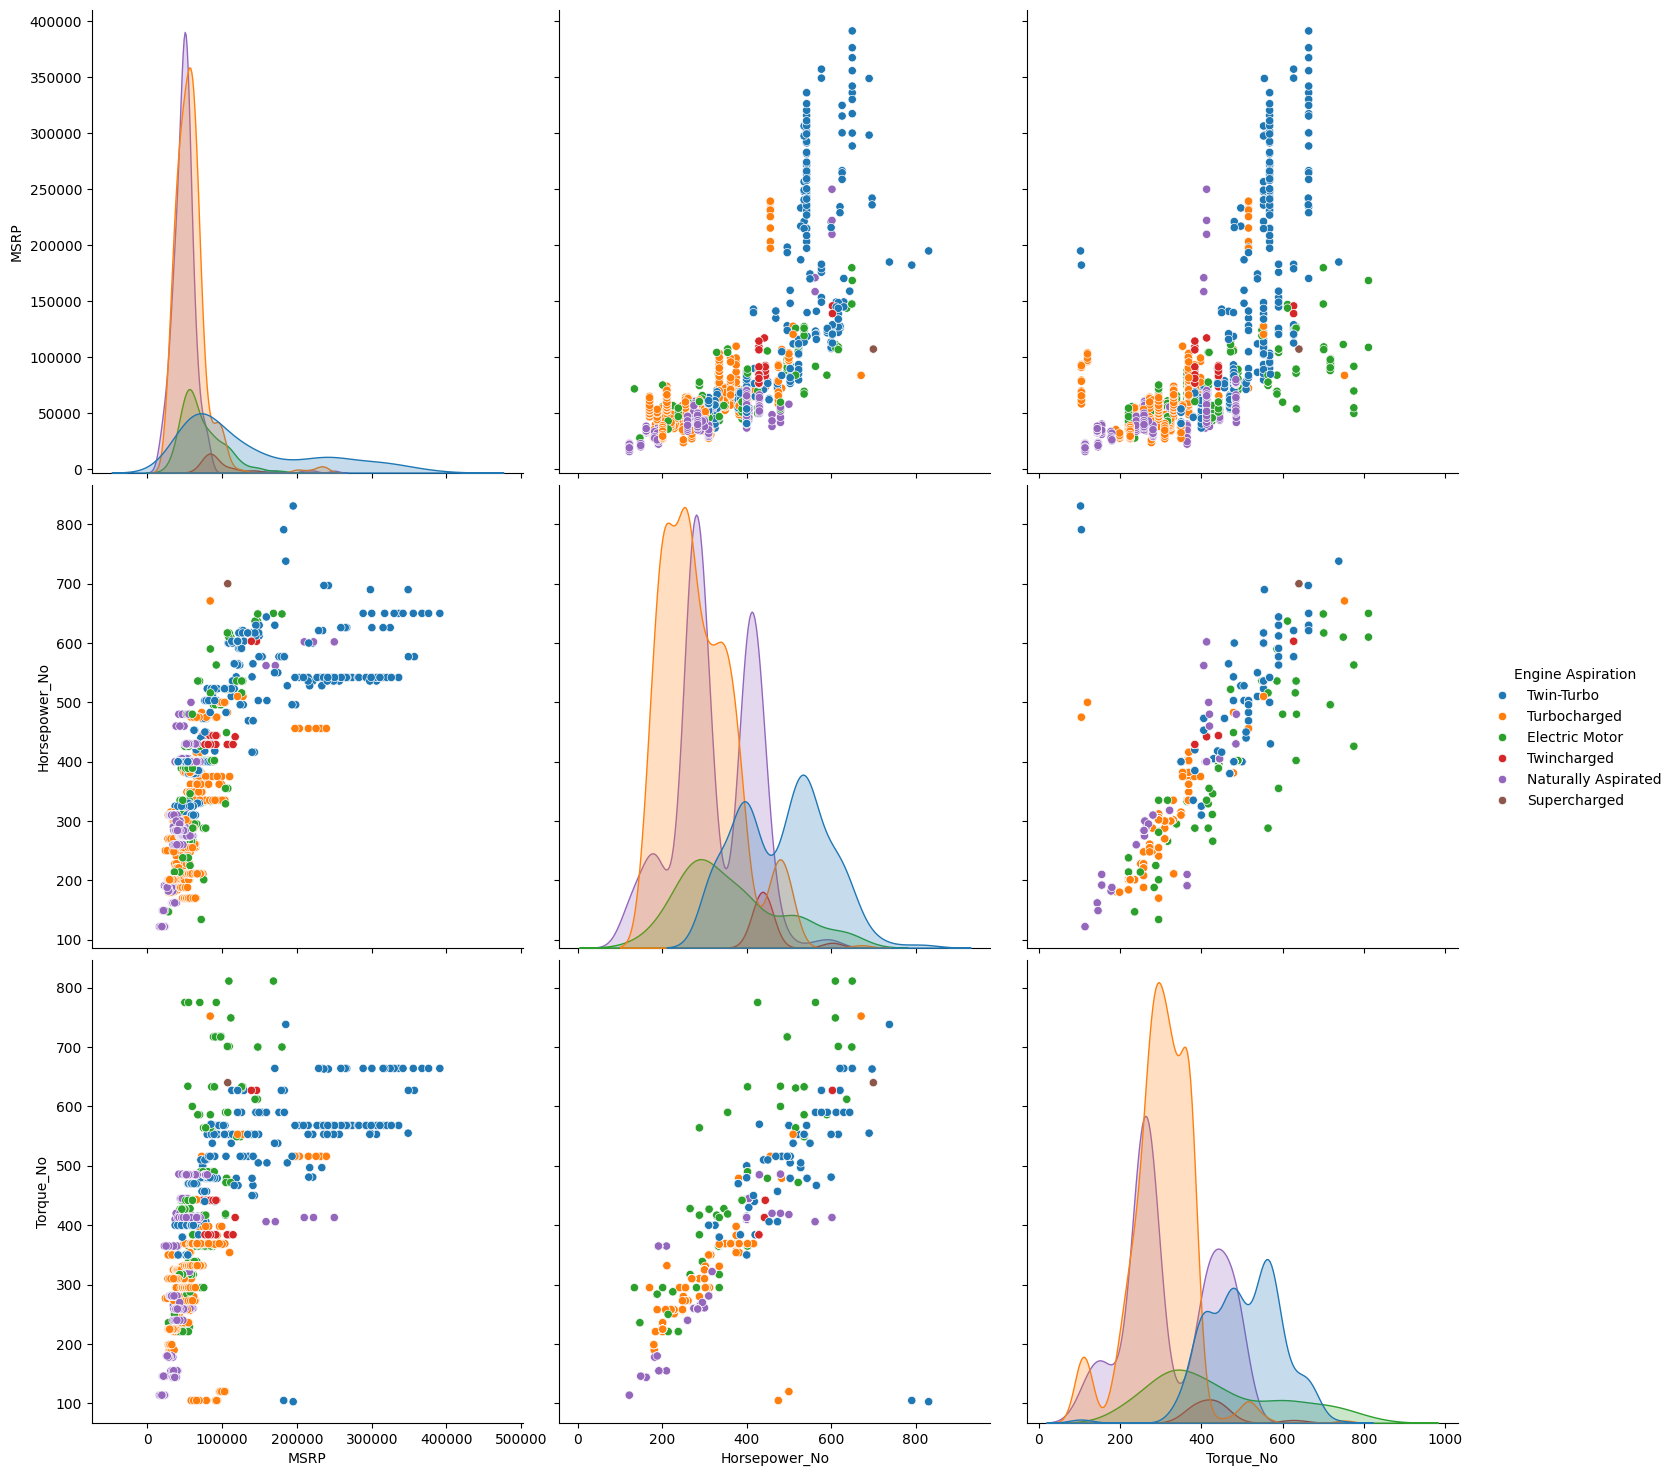

In [18]:
sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Engine Aspiration']], hue='Engine Aspiration', height = 5)
plt.show()	


Create the pair plot with a limited number of columns 
Hue-'Make'


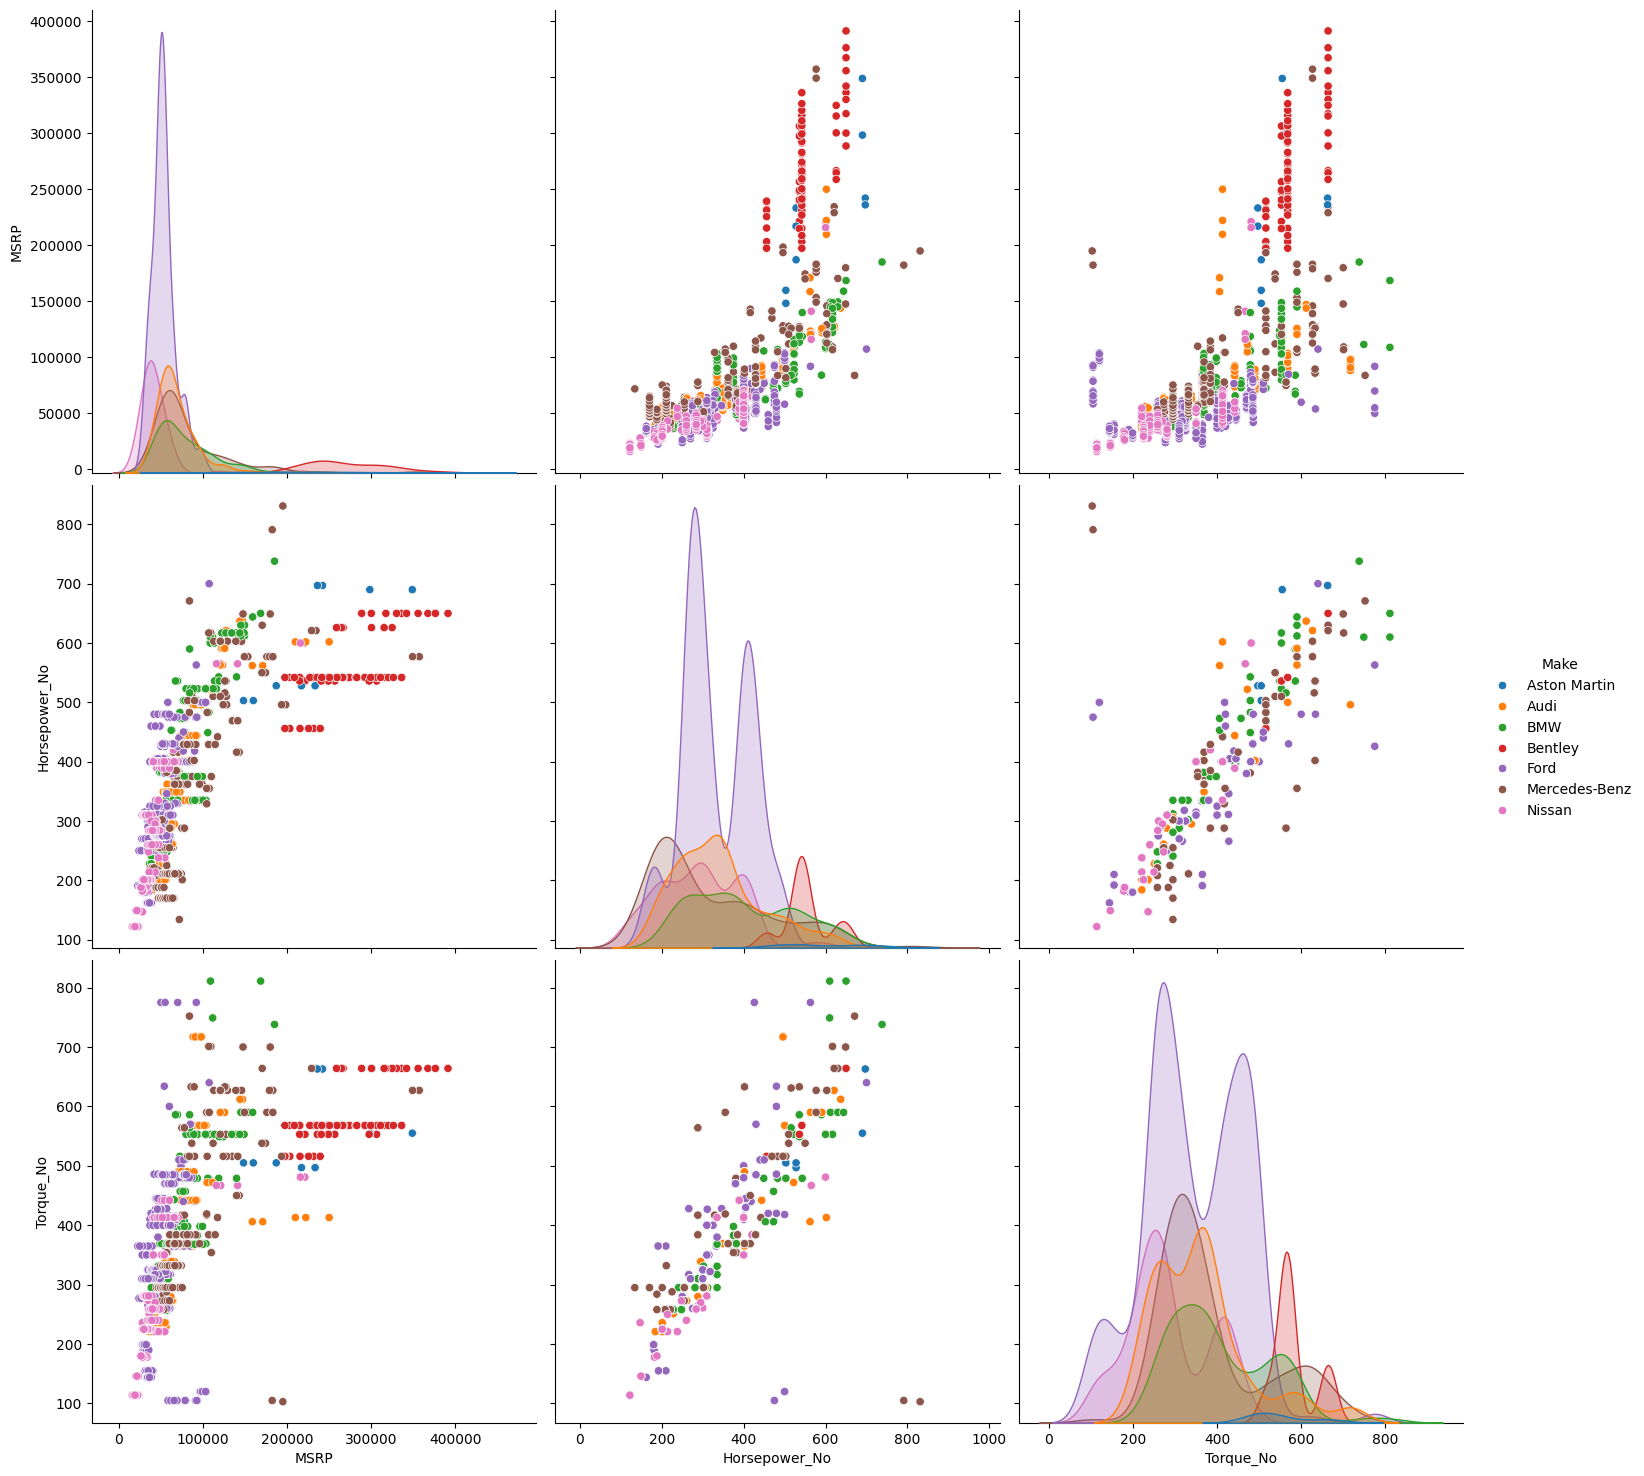

In [19]:
sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']], hue = 'Make', height = 5)
plt.show()


Visualising the categorical values

In [20]:
categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']

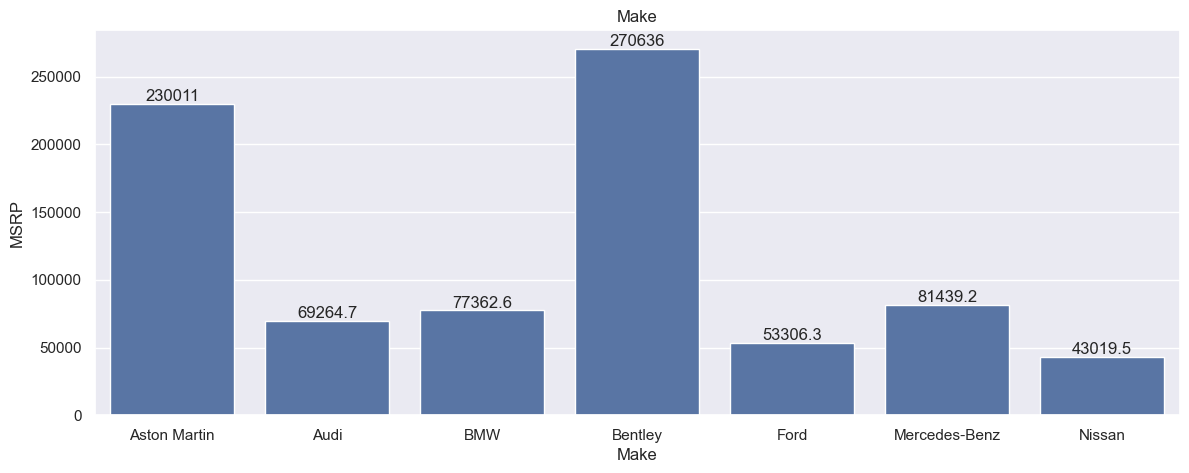

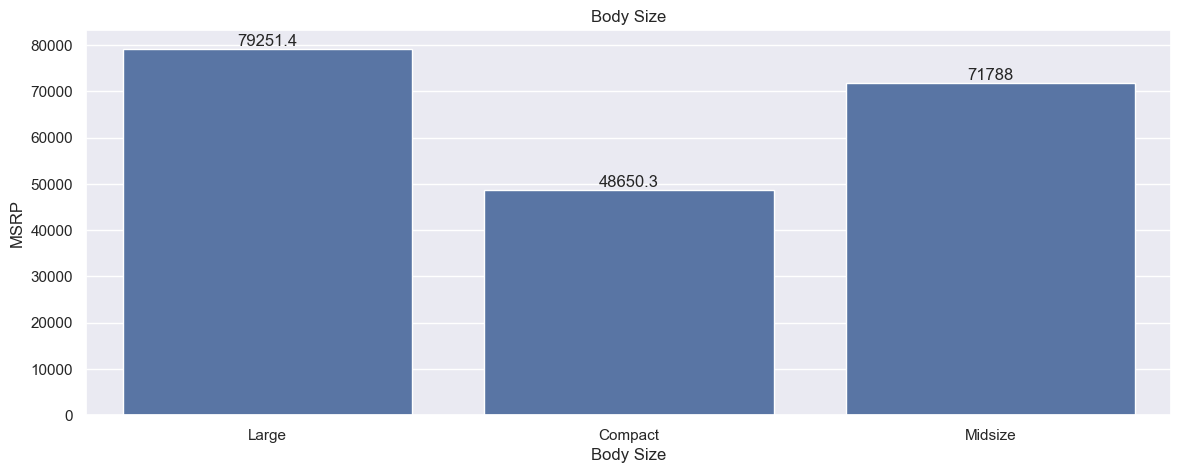

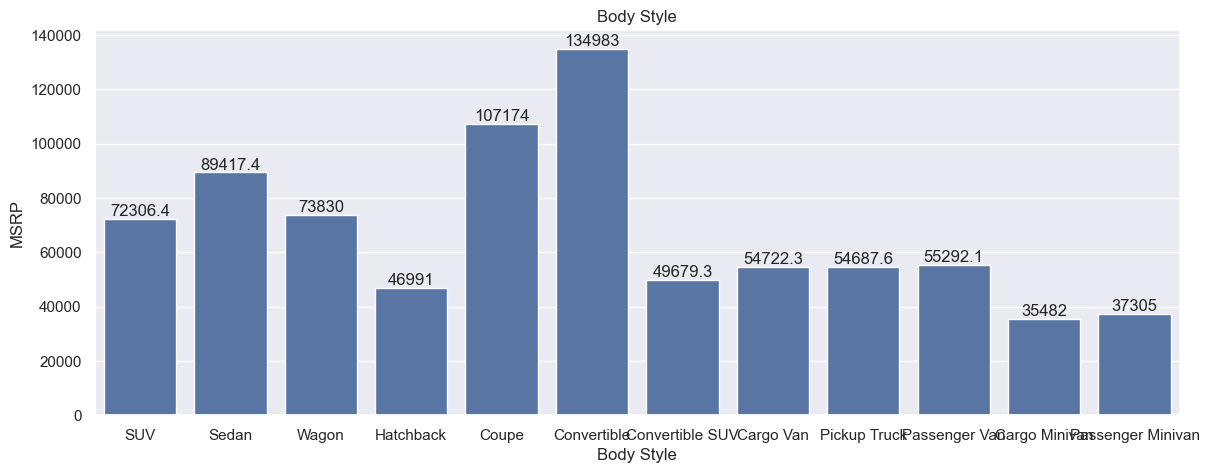

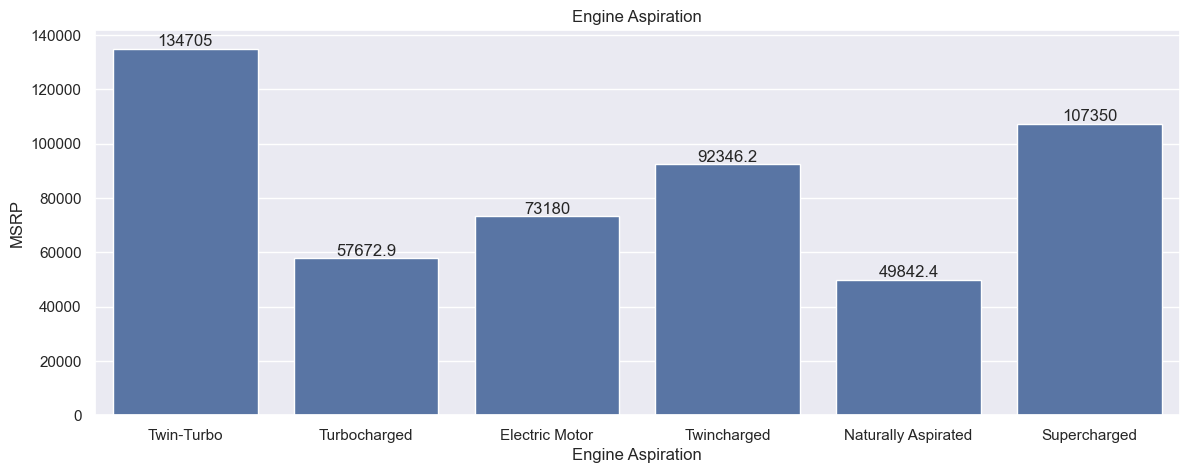

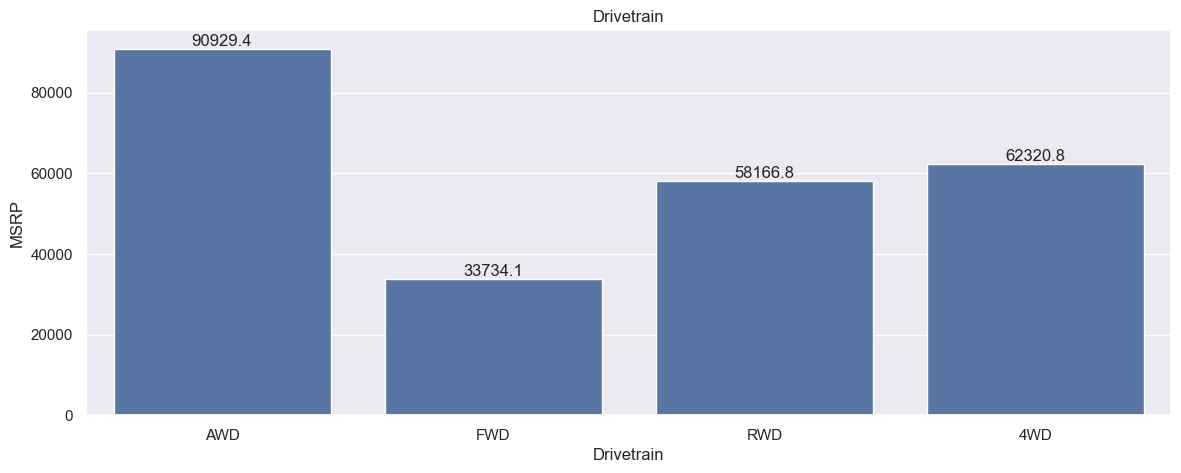

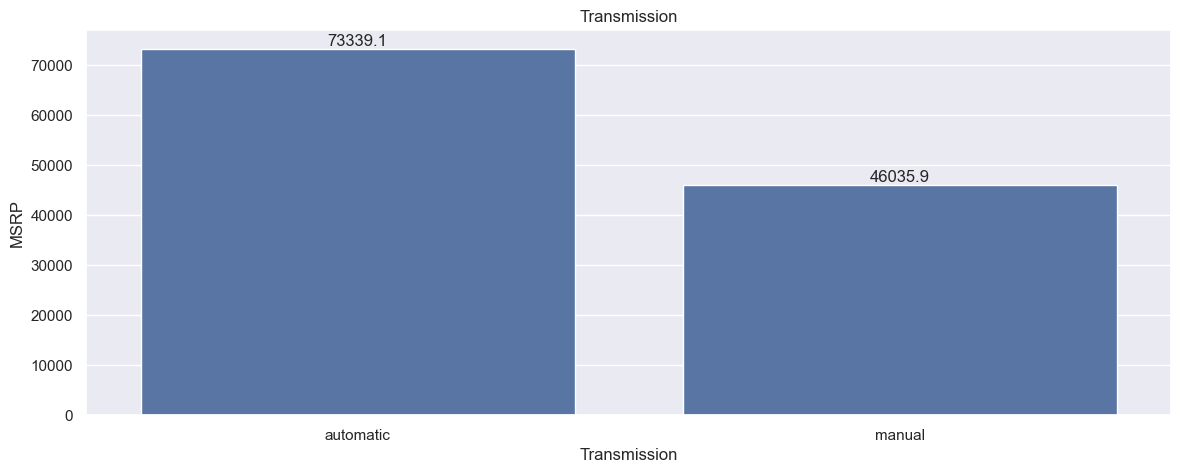

In [21]:
sns.set(rc={'figure.figsize':(14,5)})
for c in categories:
        ax = sns.barplot(x=c, y="MSRP", data=car_data, errorbar=('ci', False)) 
        for container in ax.containers:
                ax.bar_label(container)
        plt.title(c)
        plt.show()


Visualising the numerical values with Mean 

In [22]:
n_variables = ['MSRP','Used/New Price','Horsepower_No','Torque_No']

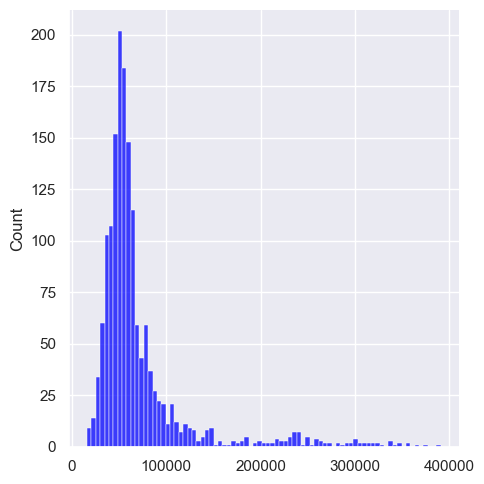

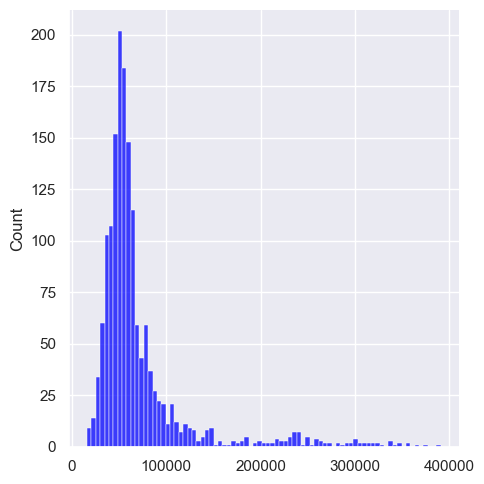

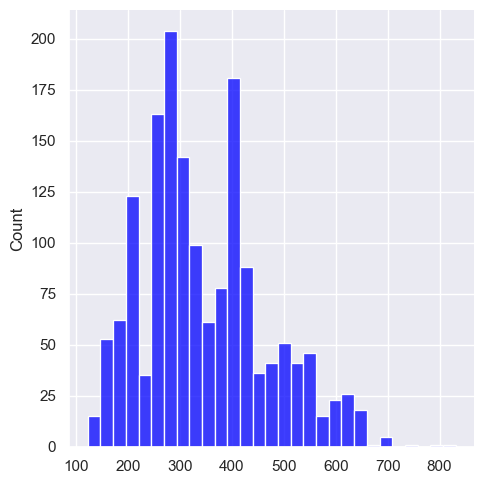

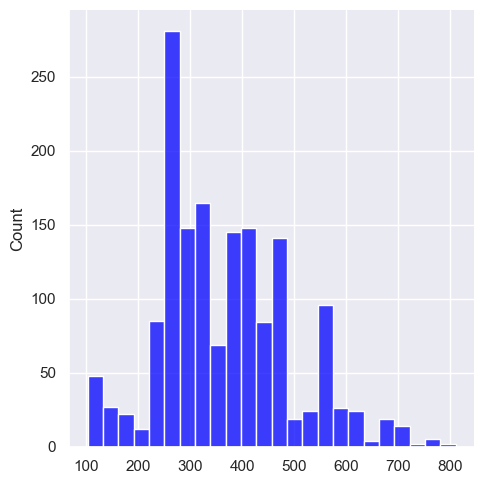

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
for n in n_variables:
    x = car_data[n].values
    sns.displot(x, color = 'blue')
    mean = car_data[n].mean()

Distribution of Numerical Values

The meadian of  MSRP :  55945.0


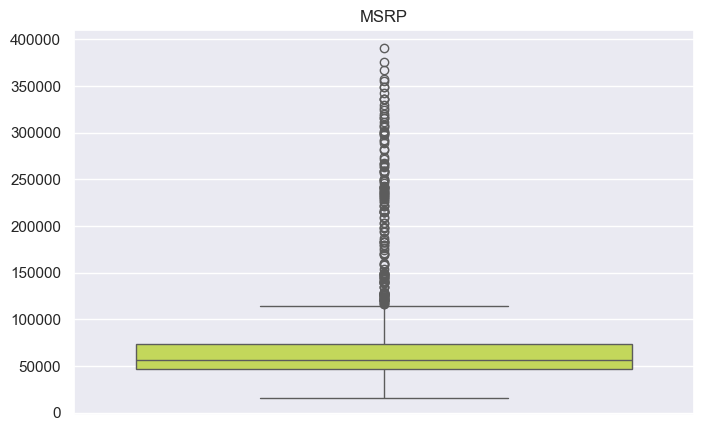

The meadian of  Used/New Price :  55945.0


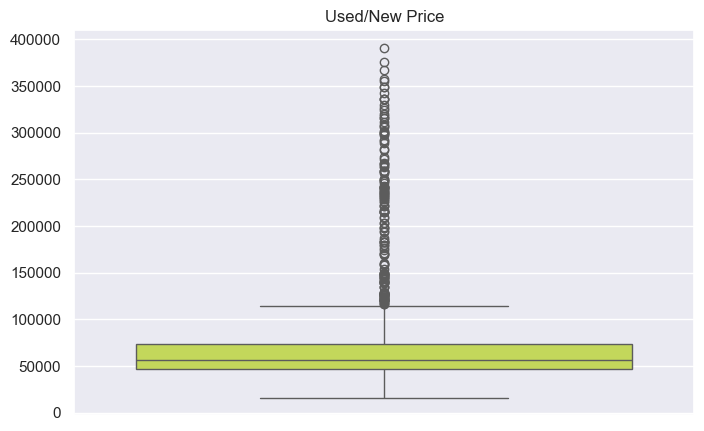

The meadian of  Horsepower_No :  325.0


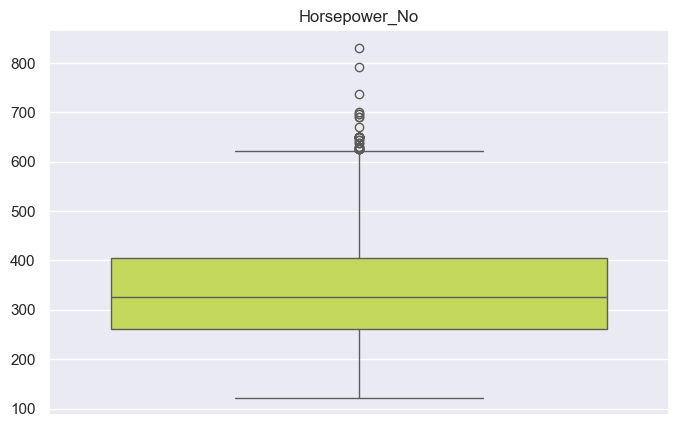

The meadian of  Torque_No :  350.0


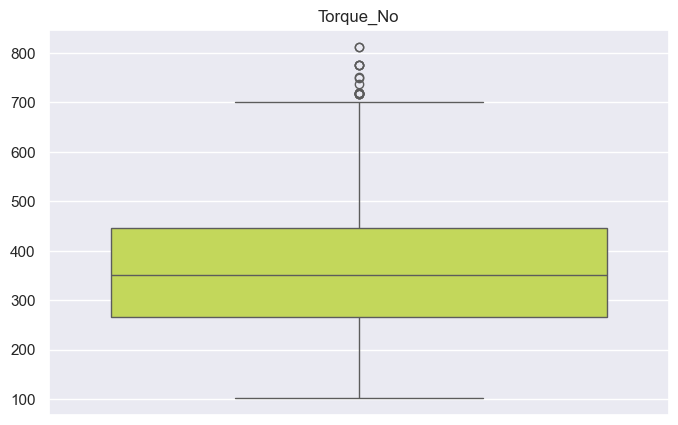

In [24]:
sns.set(rc={'figure.figsize':(8,5)})
for c in n_variables:
        x = car_data[c].values
        ax = sns.boxplot(x, color = '#D1EC46')
        print('The meadian of ',c, ': ', car_data[c].median())
        plt.title(c)
        plt.show()


Distribution of MSRP by categorical variables - by data points

In [25]:
import warnings
warnings.filterwarnings("ignore")
categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']


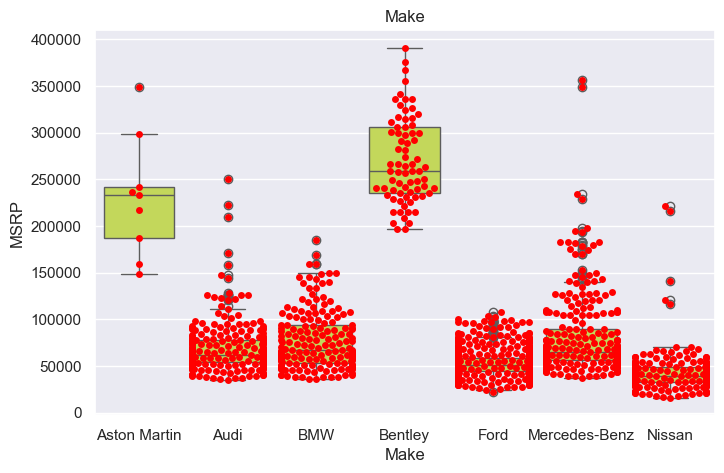

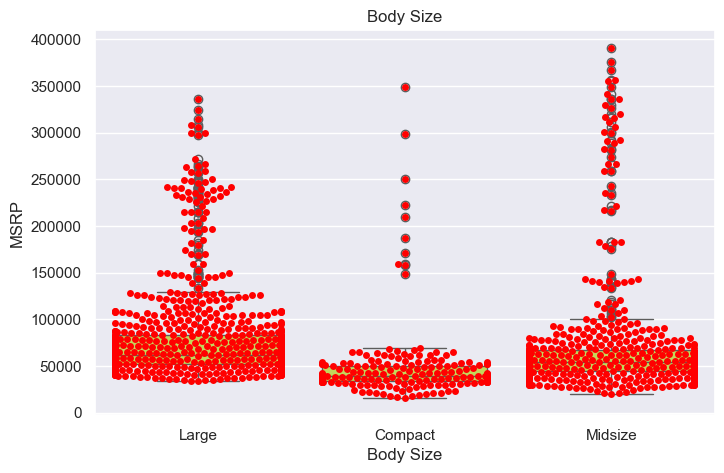

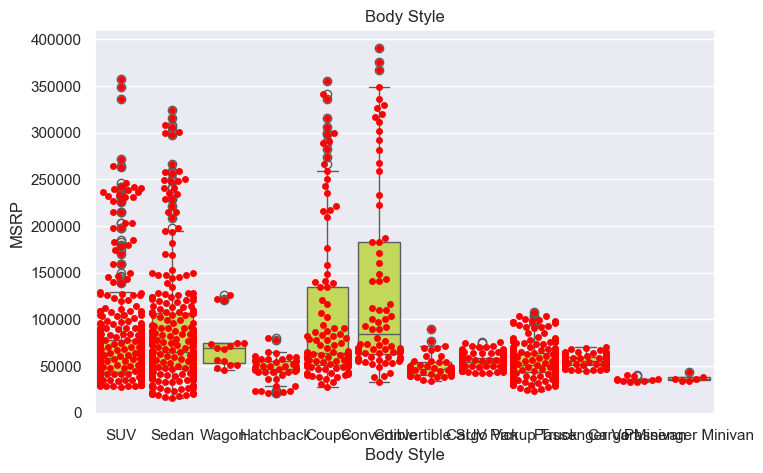

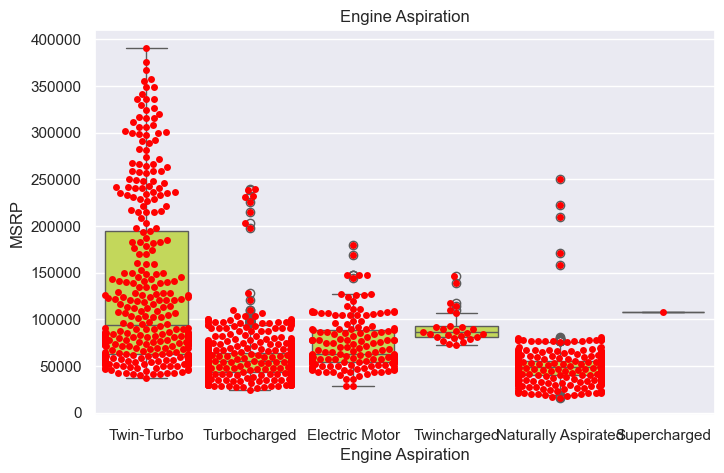

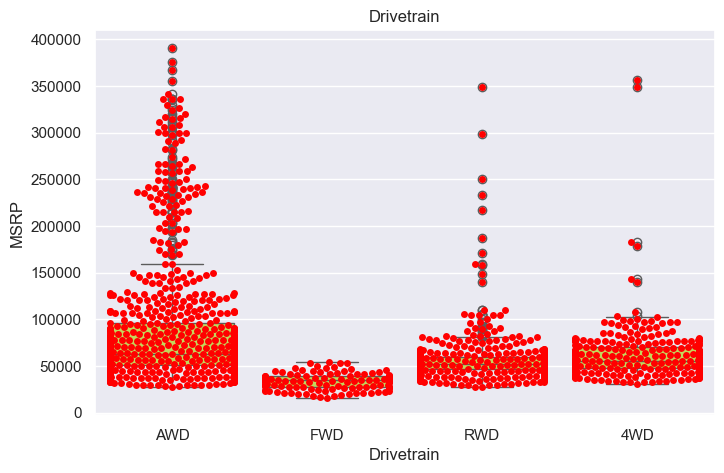

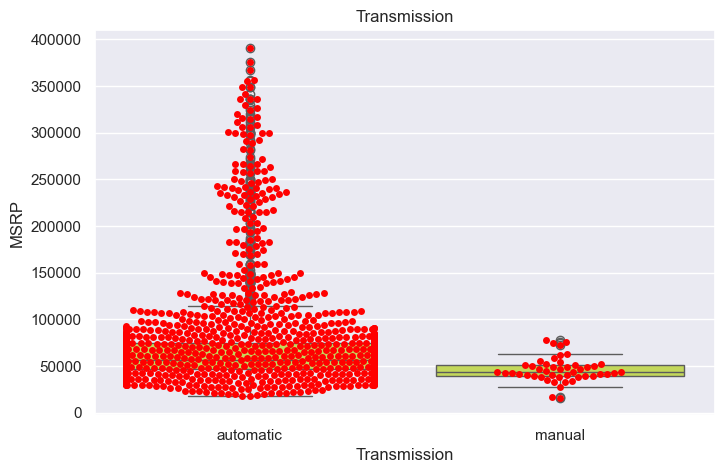

In [26]:
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax =sns.boxplot(x=c, y='MSRP', data=car_data, color='#D1EC46')
    ax =sns.swarmplot(x=c, y='MSRP', data=car_data, color='red')
    plt.title(c)
    plt.show()

Remove the columns which are not required 

In [27]:
new_car_data = car_data.drop(['index', 'Model','Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)
display (new_car_data )


,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
...,...,...,...,...,...,...,...,...,...
1605,Nissan,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1606,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1607,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0
1608,Nissan,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0


Remove the columns which are not required 

In [28]:
new_car_data = car_data.drop(['index','Model','Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)
display(new_car_data)

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
...,...,...,...,...,...,...,...,...,...
1605,Nissan,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1606,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1607,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0
1608,Nissan,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0


One-hot encoding on the selected columns 

In [29]:
new_car_data =pd.get_dummies(new_car_data, columns=['Make', 'Body Size','Body Style', 'Engine Aspiration', 
                                                    'Drivetrain', 'Engine Aspiration', 'Drivetrain', 'Transmission'], dtype='int')
display(new_car_data)



,MSRP,Horsepower_No,Torque_No,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,35800.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37800.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,41400.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,39400.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,50990.0,400.0,350.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1606,53990.0,400.0,350.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1607,53990.0,400.0,350.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1608,40990.0,400.0,350.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1


Display the correlation matrix 

In [30]:
n_variables = ['MSRP', 'Horsepower_No', 'Torque_No']
pc =new_car_data[n_variables].corr(method='pearson')
print(pc)

                   MSRP  Horsepower_No  Torque_No
MSRP           1.000000       0.703226   0.620070
Horsepower_No  0.703226       1.000000   0.785578
Torque_No      0.620070       0.785578   1.000000


Display the heatmap

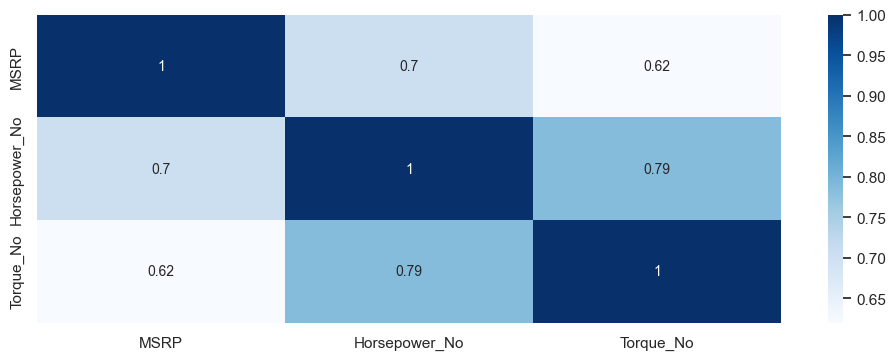

In [31]:
sns.set(rc={'figure.figsize':(12,4)})
cols = n_variables
ax =sns.heatmap(pc, annot=True,
                yticklabels=cols,
                xticklabels=cols,
                annot_kws={'size':10},
                cmap='Blues')

Create Independent Variable - X

In [32]:
x = pd.get_dummies(new_car_data.drop('MSRP', axis=1))
feature_columns = x.columns

Create Dependent Variable - Y

In [33]:
y = new_car_data['MSRP'].astype(int)
print(y.shape)


(1610,)


Train Test Split 

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80,
                                                    test_size=0.2, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1288, 46)
(322, 46)
(1288,)
(322,)


Create Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error,mean_squared_error
from math import sqrt

# Training the Regression

In [36]:
im = LinearRegression(fit_intercept= True)
im.fit(x_train, y_train)
y_pred = im.predict(x_train)
all_df_predict = im.predict(x)
print(all_df_predict)

[234895.92720418  46510.11486585  38802.33920273 ...  56480.18864755
  56480.18864755  77269.2214777 ]


Display accuracy and Error for Training and Test Data 

In [37]:
print('The Accuracy On the training dataset is:', im.score(x_test, y_test))

print("")
#The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is:', sqrt(mean_squared_error(y_train, y_pred)))

print('The RmSE on the testing dataset is:', sqrt(mean_squared_error(y_test, im.predict(x_test))))

#The mean absolute error
print('The maeon the training dataset is :',mean_absolute_error(y_train,y_pred))
print('The mae on the testing dataset is :', mean_absolute_error(y_test, im.predict(x_test)))

print('Coefficient', im.coef_)
print('intercept', im.predict)

The Accuracy On the training dataset is: 0.9198625302493006

The RMSE on the training dataset is: 17421.778448096604
The RmSE on the testing dataset is: 16534.594571973666
The maeon the training dataset is : 10599.011937878484
The mae on the testing dataset is : 11090.08834959269
Coefficient [ 2.22742940e+02 -1.89829669e+01  5.56034182e+04 -2.91161207e+04
 -3.66042366e+04  1.16226113e+05 -4.43839570e+04 -1.62628570e+04
 -4.54623600e+04  9.29404094e+01 -1.88423591e+02  9.54831816e+01
  6.09802309e+02  8.15969817e+03  1.42360673e+04  1.18332658e+02
  6.41353581e+02 -4.42967483e+03  6.15846845e+03  8.27078966e+03
 -1.77754623e+04 -5.15286113e+03 -3.70758421e+03 -7.12892964e+03
  3.14987876e+03  9.01350217e+02 -6.74886957e+03 -1.26502293e+02
  5.37882925e+03 -2.55468637e+03  2.41994691e+03 -1.68735797e+03
  2.16652986e+03 -2.89911881e+03  3.14987876e+03  9.01350217e+02
 -6.74886957e+03 -1.26502293e+02  5.37882925e+03 -2.55468637e+03
  2.41994691e+03 -1.68735797e+03  2.16652986e+03 -2.89911

In [38]:
pickle.dump(im, open('linear_model.pkl', 'wb'))
pickle.dump(x.columns, open('feature_columns.pkl', 'wb'))

In [39]:
import os
print(os.listdir())


['car_price.ipynb', 'feature_columns.pkl', 'linear_model.pkl']


In [40]:
model = pickle.load(open('linear_model.pkl', 'rb'))
feature_columns = pickle.load(open('feature_columns.pkl', 'rb'))

#Create Pickle, Deployment File

In [41]:
# 1️⃣ Input DataFrame
input_df = pd.DataFrame([{
    'Horsepower_No': 250,
    'Torque_No': 300,
    'Make': 'Ford',
    'Body Size': 'Midsize',
    'Body Style': 'Sedan',
    'Engine Aspiration': 'Naturally Aspirated',
    'Drivetrain': 'FWD',
    'Transmission': 'Automatic'
}])

# 2️⃣ One-hot encoding
input_df = pd.get_dummies(input_df)

# 3️⃣ 🔥 MOST IMPORTANT LINE (missing columns fix)
input_df = input_df.reindex(columns=feature_columns, fill_value=0)

# 4️⃣ Prediction
prediction = model.predict(input_df)
print("Predicted Car Price:", prediction[0])


Predicted Car Price: 32320.7595946411


In [42]:
print("Input shape:", input_df.shape)
print("Model expects:", model.n_features_in_)


Input shape: (1, 46)
Model expects: 46


In [43]:
prediction = model.predict(input_df)
print("Predicted Car Price:", prediction[0])


Predicted Car Price: 32320.7595946411
